In [1]:
import numpy as np
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import cv2 as cv
import seaborn as sns
import pandas as pd
import sklearn.linear_model as lm

# Rename and Resize the images

In [4]:
path='.\data\cat'

In [6]:
count=0
for i in os.listdir(path):
    src=os.path.join(path,i)
    dst=os.path.join(path,'c'+count.__str__()+'.jpg')
    os.rename(src,dst)
    count+=1

In [7]:
width_list=[]
height_list=[]
name_list=[]
for i in os.listdir(path):
    img=Image.open(path+"\\"+i)
    width,height=img.size
    width_list.append(width)
    height_list.append(height)
    name_list.append(i)
info_df_cat=pd.DataFrame({"name":name_list,"width":width_list,"height":height_list})

In [8]:
info_df_cat

,name,width,height
0,c0.jpg,500,374
1,c1.jpg,300,280
2,c10.jpg,319,177
3,c100.jpg,350,299
4,c1000.jpg,500,374
...,...,...,...
22492,c9995.jpg,179,166
22493,c9996.jpg,500,374
22494,c9997.jpg,200,138
22495,c9998.jpg,320,239


In [9]:
info_df_cat.describe()

,width,height
count,22497.000000,22497.000000
mean,284.977953,254.943104
std,161.787497,134.406788
min,50.000000,32.000000
25%,128.000000,128.000000
50%,243.000000,223.000000
75%,499.000000,374.000000
max,1023.000000,768.000000


<Axes: xlabel='height'>

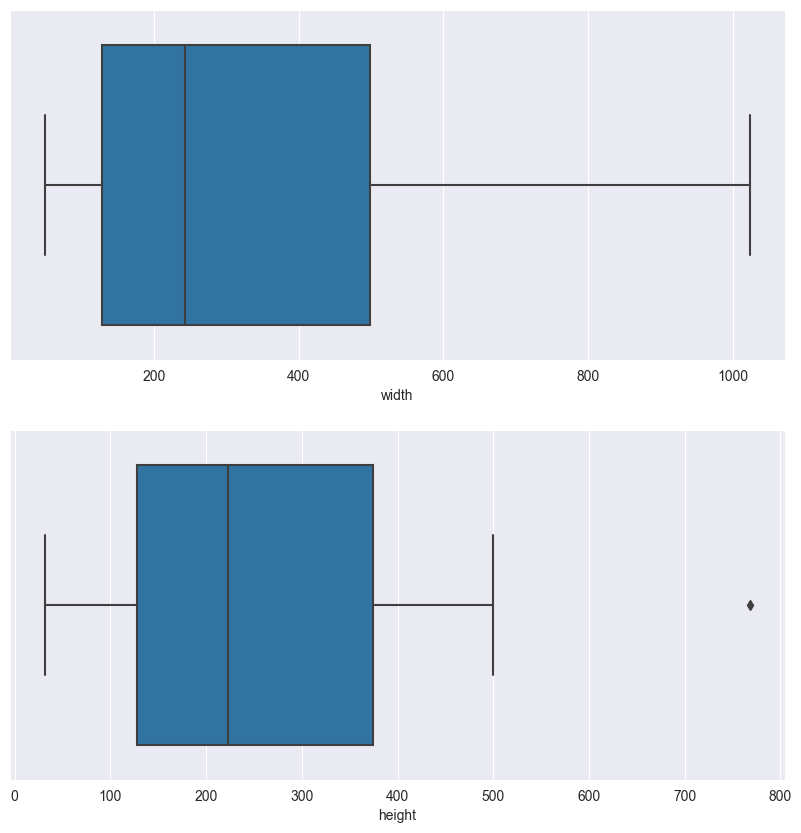

In [10]:
f,ax=plt.subplots(2,1,figsize=(10,10))
sns.boxplot(x="width",data=info_df_cat,ax=ax[0])
sns.boxplot(x="height",data=info_df_cat,ax=ax[1])

<Axes: xlabel='width', ylabel='height'>

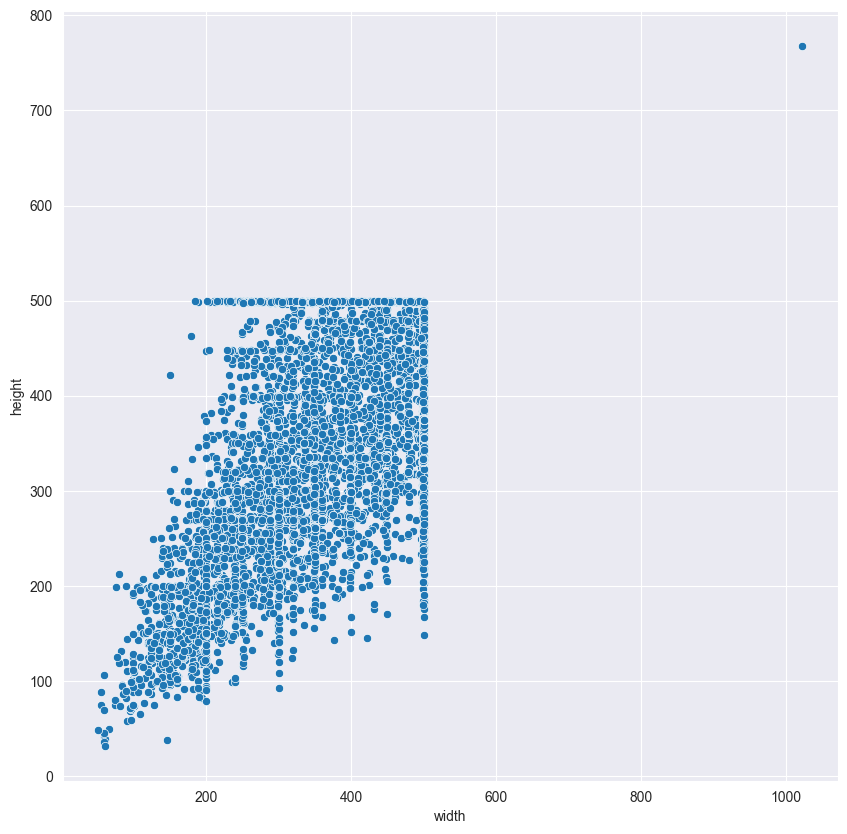

In [11]:
f=plt.figure(figsize=(10,10))
sns.scatterplot(x="width",y="height",data=info_df_cat)

In [12]:
lr=lm.LinearRegression()
lr.fit(np.array(info_df_cat["width"]).reshape(-1,1),np.array(info_df_cat["height"]).reshape(-1,1))

LinearRegression()

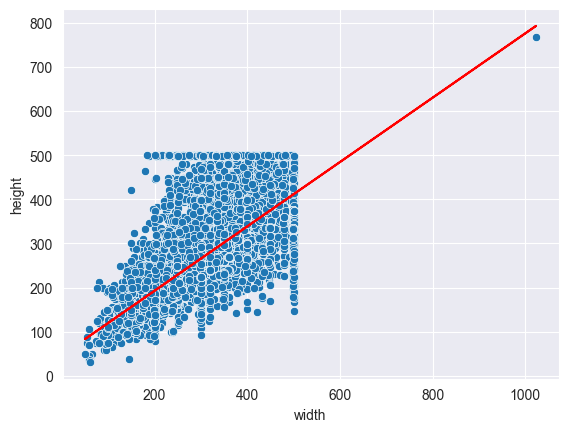

In [14]:
sns.scatterplot(x="width",y="height",data=info_df_cat)
plt.plot(np.array(info_df_cat["width"]),lr.predict(np.array(info_df_cat["width"]).reshape(-1,1)),color="red")

In [15]:
print(lr.coef_,lr.intercept_)

[[0.72823019]] [47.41355503]


According to linear regression, we can find that the height and width does not have strong linear relationship. So we can not resize the images to a fixed size. We can only resize the images to a fixed size and then crop the images to a fixed size.

In [16]:
info_df_cat.describe()

,width,height
count,22497.000000,22497.000000
mean,284.977953,254.943104
std,161.787497,134.406788
min,50.000000,32.000000
25%,128.000000,128.000000
50%,243.000000,223.000000
75%,499.000000,374.000000
max,1023.000000,768.000000


It is not hard to find that there is a obvious gathering  in the length of 1024 and 512, and they are all the mutiple of 128. So we can resize the images to 128*128.

Do the same thing to the dog images.

In [2]:
path='.\data\dog'
count=0
for i in os.listdir(path):
    src=os.path.join(path,i)
    dst=os.path.join(path,'d'+count.__str__()+'.jpg')
    os.rename(src,dst)
    count+=1

In [3]:
width_list=[]
height_list=[]
name_list=[]
for i in os.listdir(path):
    img=Image.open(path+"\\"+i)
    width,height=img.size
    width_list.append(width)
    height_list.append(height)
    name_list.append(i)
info_df_dog=pd.DataFrame({"name":name_list,"width":width_list,"height":height_list})

In [4]:
info_df_dog

,name,width,height
0,d0.jpg,128,128
1,d1.jpg,128,128
2,d10.jpg,128,128
3,d100.jpg,128,128
4,d1000.jpg,128,128
...,...,...,...
22783,d9995.jpg,128,128
22784,d9996.jpg,128,128
22785,d9997.jpg,128,128
22786,d9998.jpg,128,128


In [5]:
info_df_dog.describe()

,width,height
count,22788.000000,22788.000000
mean,275.926233,257.722354
std,156.923002,138.017620
min,42.000000,33.000000
25%,128.000000,128.000000
50%,222.500000,221.000000
75%,449.000000,375.000000
max,1050.000000,702.000000


<Axes: xlabel='height'>

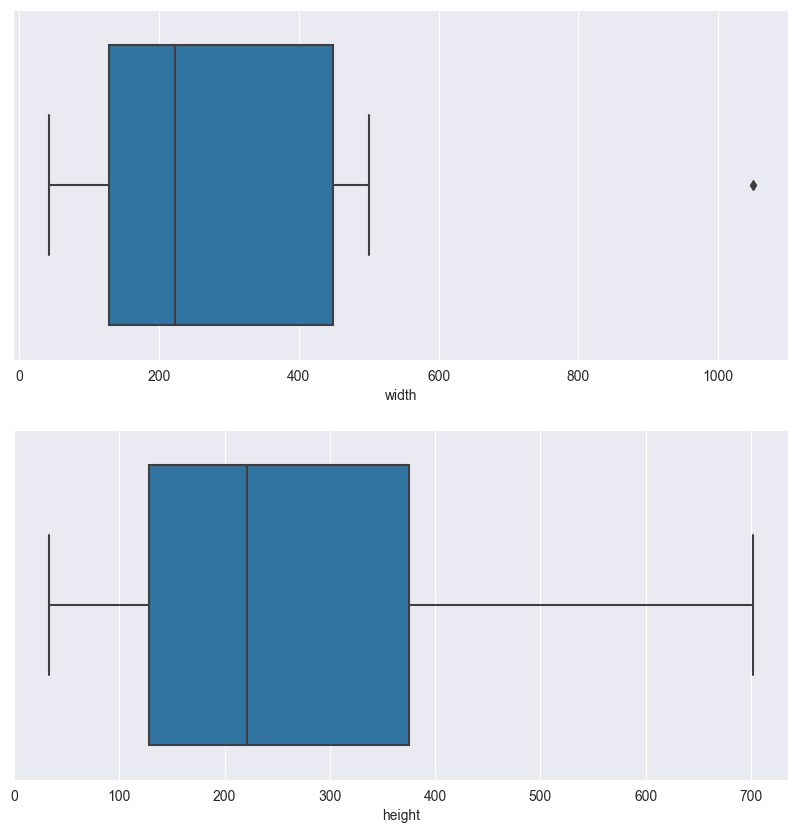

In [6]:
f,ax=plt.subplots(2,1,figsize=(10,10))
sns.boxplot(x="width",data=info_df_dog,ax=ax[0])
sns.boxplot(x="height",data=info_df_dog,ax=ax[1])

<Axes: xlabel='width', ylabel='height'>

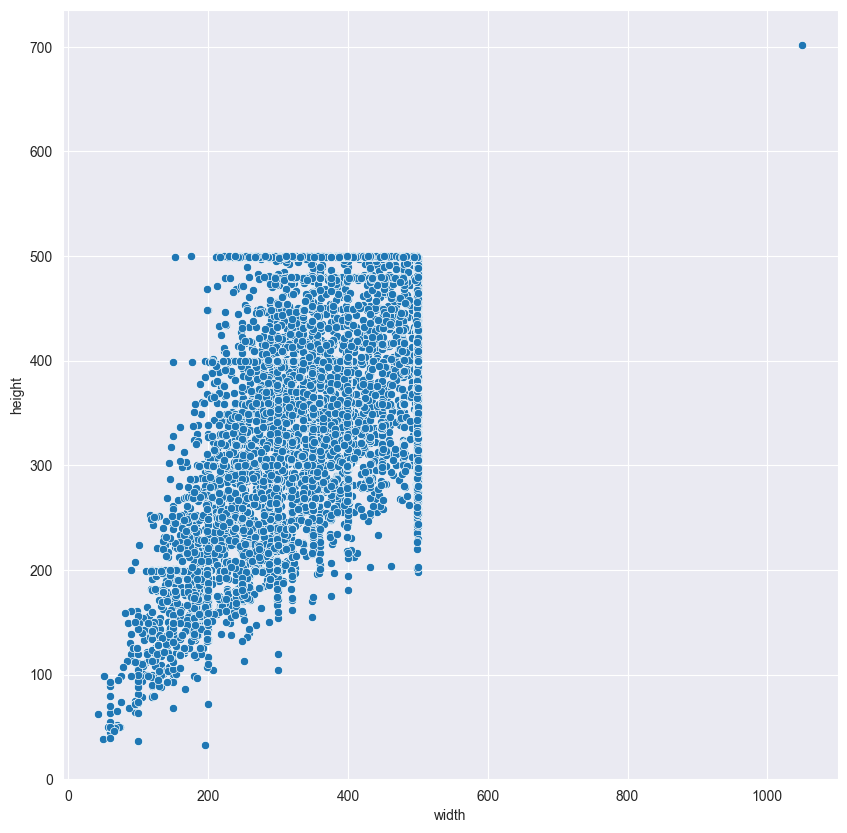

In [7]:
f=plt.figure(figsize=(10,10))
sns.scatterplot(x="width",y="height",data=info_df_dog)


In [8]:
lr=lm.LinearRegression()
lr.fit(np.array(info_df_dog["width"]).reshape(-1,1),np.array(info_df_dog["height"]).reshape(-1,1))

LinearRegression()

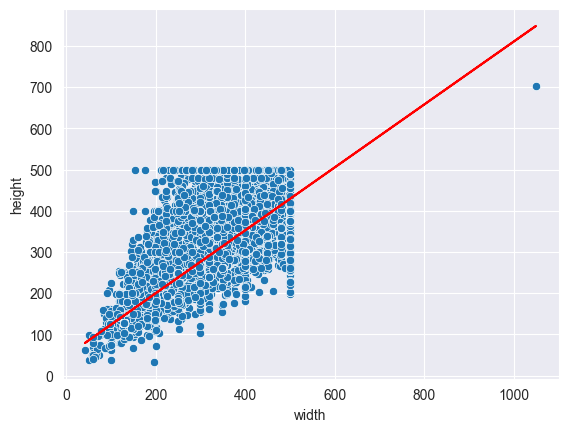

In [9]:
sns.scatterplot(x="width",y="height",data=info_df_dog)
plt.plot(np.array(info_df_dog["width"]),lr.predict(np.array(info_df_dog["width"]).reshape(-1,1)),color="red")

In [10]:
print(lr.coef_,lr.intercept_)

[[0.76322176]] [47.12944856]


The same thing can be found in the dog images.

So, we can resize the images to 128*128.

In [11]:
path='.\data\cat'
for i in os.listdir(path):
    img=Image.open(path+"\\"+i)
    img=img.resize((128,128))
    img.save(path+"\\"+i)

In [12]:
path='.\data\dog'
for i in os.listdir(path):
    img=Image.open(path+"\\"+i)
    img=img.resize((128,128))
    img.save(path+"\\"+i)

To confirm the resize operation has no influence on classification, we can randomly select 20 images from the cat and dog images and show them.

In [13]:
path='.\data\cat'
img_list=[]
for i in range(20):
    img=Image.open(path+"\\"+os.listdir(path)[np.random.randint(0,9997)])
    img_list.append(img)

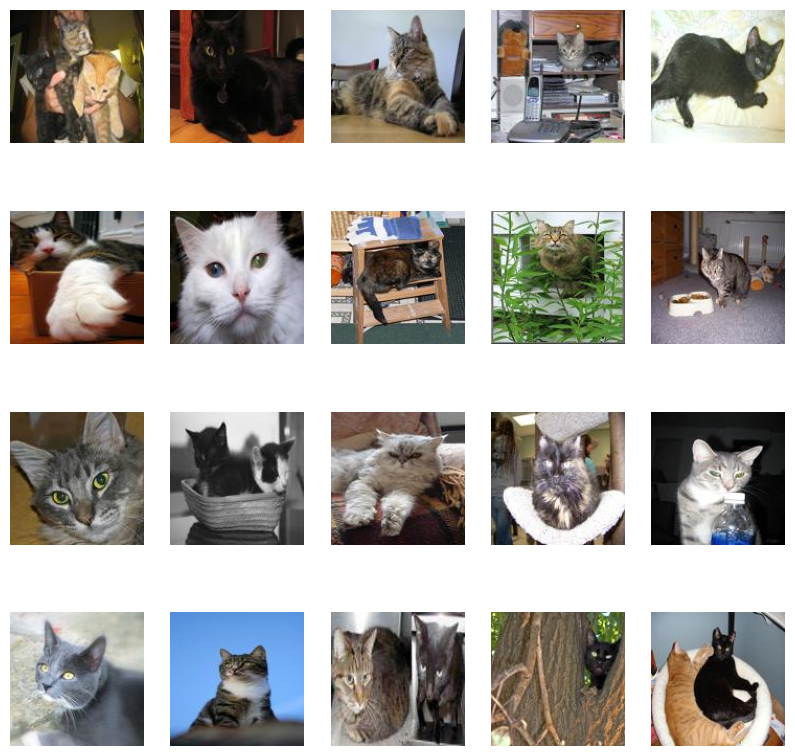

In [14]:
f,ax=plt.subplots(4,5,figsize=(10,10))
for i in range(4):
    for j in range(5):
        ax[i,j].imshow(img_list[i*5+j])
        ax[i,j].axis("off")

In [15]:
path='.\data\dog'
img_list=[]
for i in range(20):
    img=Image.open(path+"\\"+os.listdir(path)[np.random.randint(0,9997)])
    img_list.append(img)

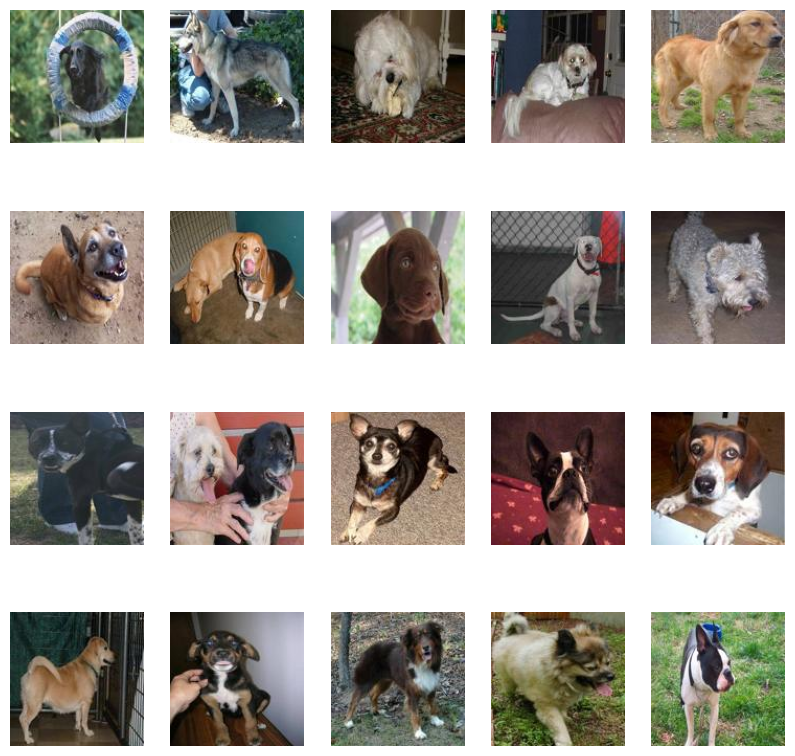

In [16]:
f,ax=plt.subplots(4,5,figsize=(10,10))
for i in range(4):
    for j in range(5):
        ax[i,j].imshow(img_list[i*5+j])
        ax[i,j].axis("off")

Althogh some image are a little anamorphose, we can still recognize whether it is a cat or a dog.